In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

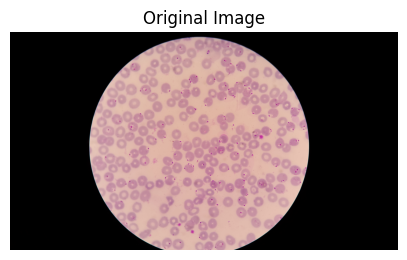

In [ ]:
# Define path to a test image for manual inspection
test_image_path = os.path.join('NIH-NLM-ThinBloodSmearsPf', 'Polygon Set', 
                                   '209C68P29N_ThinF', 'Img', 'IMG_20150819_133236.jpg')

bgr = cv2.imread(test_image_path)
rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5, 5))
plt.imshow(rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()

# Color Space and Filters Investigation

## Filters

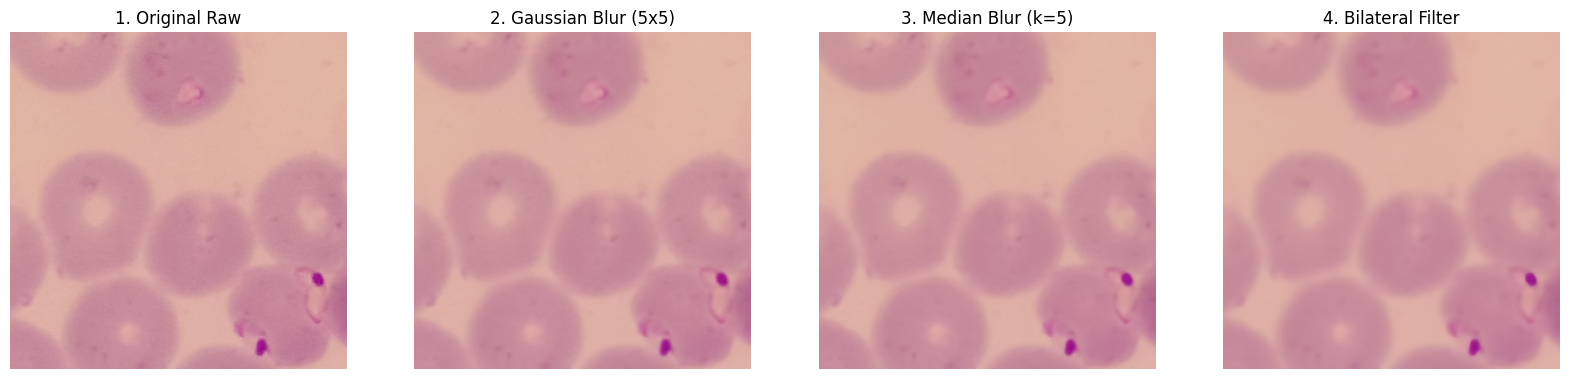

In [ ]:
#Gaussian Blur (Standard smoothing)
rgb_gauss = cv2.GaussianBlur(rgb, (5, 5), 0)

#Median Blur
rgb_median = cv2.medianBlur(rgb, 5)

#Bilateral Filter (Texture smoothing)
rgb_bilateral = cv2.bilateralFilter(rgb, 9, 75, 75)

# Zoom Region Selection
h, w, _ = rgb.shape
y1, y2 = h//2 - 200, h//2 + 200
x1, x2 = w//2 - 200, w//2 + 200

fig, ax = plt.subplots(1, 4, figsize=(20, 6))
ax[0].imshow(rgb[y1:y2, x1:x2])
ax[0].set_title("1. Original Raw")

# Gaussian
ax[1].imshow(rgb_gauss[y1:y2, x1:x2])
ax[1].set_title("2. Gaussian Blur (5x5)")

# Median
ax[2].imshow(rgb_median[y1:y2, x1:x2])
ax[2].set_title("3. Median Blur (k=5)")

# Bilateral
ax[3].imshow(rgb_bilateral[y1:y2, x1:x2])
ax[3].set_title("4. Bilateral Filter")

for a in ax: a.axis('off')
plt.show()

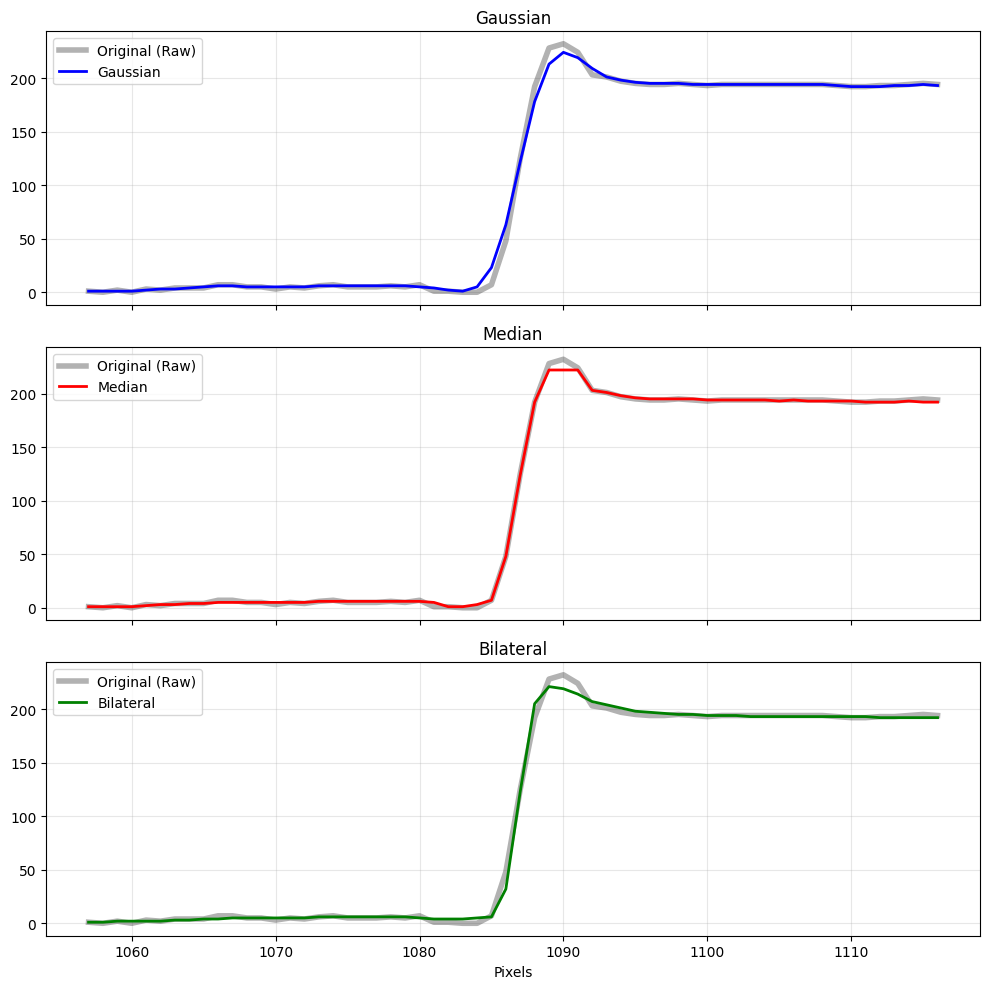

In [68]:
h, w, _ = rgb.shape
y_coord = h // 2 

sig_raw = rgb[y_coord, :, 1]
sig_gauss = rgb_gauss[y_coord, :, 1]
sig_med = rgb_median[y_coord, :, 1]
sig_bilat = rgb_bilateral[y_coord, :, 1]

gradient = np.abs(np.gradient(sig_raw))
edge_idx = np.argmax(gradient)

zoom_win = 30
x_start = max(0, edge_idx - zoom_win)
x_end = min(w, edge_idx + zoom_win)
x_axis = range(x_start, x_end)

fig, ax = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

ax[0].plot(x_axis, sig_raw[x_start:x_end], 'k-', alpha=0.3, linewidth=4, label='Original (Raw)')
ax[0].plot(x_axis, sig_gauss[x_start:x_end], 'b-', linewidth=2, label='Gaussian')
ax[0].set_title("Gaussian")
ax[0].legend()
ax[0].grid(True, alpha=0.3)

ax[1].plot(x_axis, sig_raw[x_start:x_end], 'k-', alpha=0.3, linewidth=4, label='Original (Raw)')
ax[1].plot(x_axis, sig_med[x_start:x_end], 'r-', linewidth=2, label='Median')
ax[1].set_title("Median")
ax[1].legend()
ax[1].grid(True, alpha=0.3)

ax[2].plot(x_axis, sig_raw[x_start:x_end], 'k-', alpha=0.3, linewidth=4, label='Original (Raw)')
ax[2].plot(x_axis, sig_bilat[x_start:x_end], 'g-', linewidth=2, label='Bilateral')
ax[2].set_title("Bilateral")
ax[2].legend()
ax[2].grid(True, alpha=0.3)

plt.xlabel("Pixels")
plt.tight_layout()
plt.show()

## Color Space

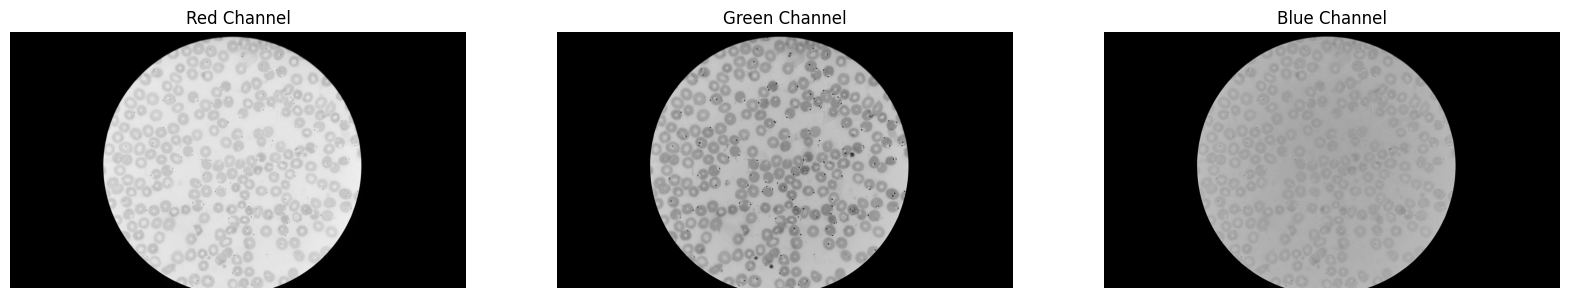

In [16]:
r, g, b = cv2.split(rgb)
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

ax[0].imshow(r, cmap='gray')
ax[0].set_title("Red Channel")

ax[1].imshow(g, cmap='gray')
ax[1].set_title("Green Channel")

ax[2].imshow(b, cmap='gray')
ax[2].set_title("Blue Channel")

for a in ax: a.axis('off')
plt.show()

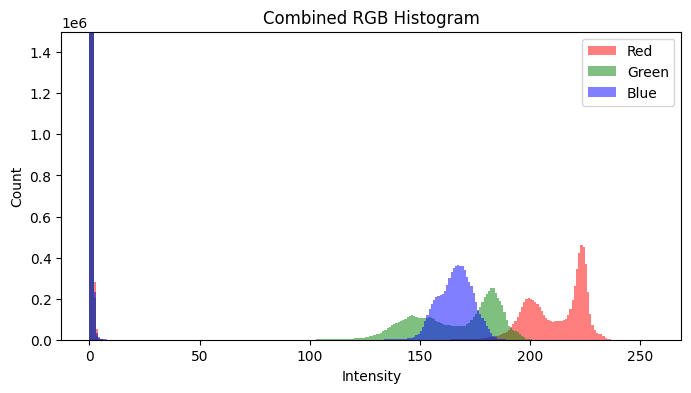

In [27]:
plt.figure(figsize=(8, 4))

plt.hist(r.ravel(), 256, range=[0, 256], color='red', alpha=0.5, label='Red')
plt.hist(g.ravel(), 256, range=[0, 256], color='green', alpha=0.5, label='Green')
plt.hist(b.ravel(), 256, range=[0, 256], color='blue', alpha=0.5, label='Blue')
plt.ylim(0,1.5e6)

plt.title("Combined RGB Histogram")
plt.xlabel("Intensity")
plt.ylabel("Count")
plt.legend()
plt.show()

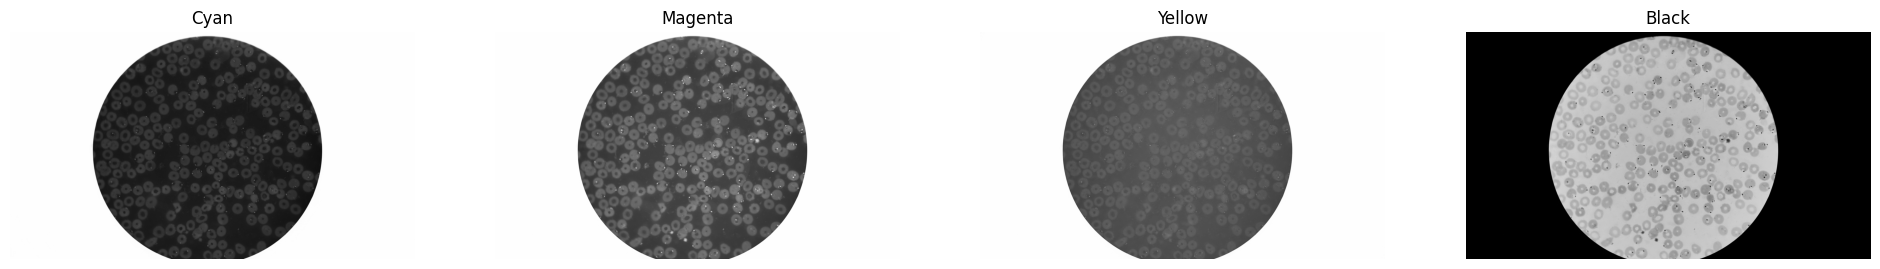

In [38]:
c = 255 - r
m = 255 - g
y = 255 - b
k = np.min(rgb, axis=2)

fig, ax = plt.subplots(1, 4, figsize=(24, 6))

ax[0].imshow(c, cmap='gray')
ax[0].set_title("Cyan")

ax[1].imshow(m, cmap='gray')
ax[1].set_title("Magenta")

ax[2].imshow(y, cmap='gray')
ax[2].set_title("Yellow")

ax[3].imshow(k, cmap='gray')
ax[3].set_title("Black")

for a in ax: a.axis('off')
plt.show()

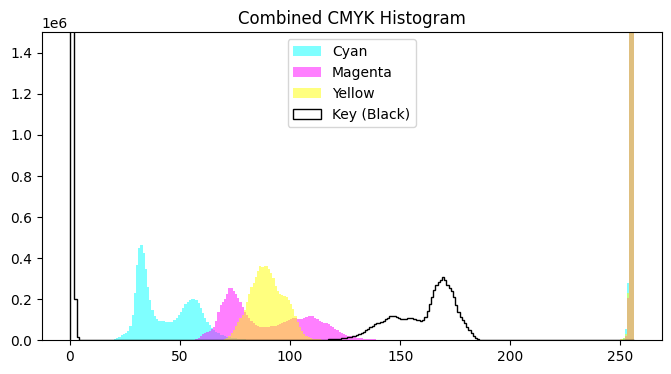

In [31]:
plt.figure(figsize=(8, 4))

plt.hist(c.ravel(), 256, range=[0, 256], color='cyan', alpha=0.5, label='Cyan')
plt.hist(m.ravel(), 256, range=[0, 256], color='magenta', alpha=0.5, label='Magenta')
plt.hist(y.ravel(), 256, range=[0, 256], color='yellow', alpha=0.5, label='Yellow')
plt.hist(k.ravel(), 256, range=[0, 256], color='black', histtype='step', label='Key (Black)')
plt.ylim(0,1.5e6)
plt.title("Combined CMYK Histogram")
plt.legend()
plt.show()

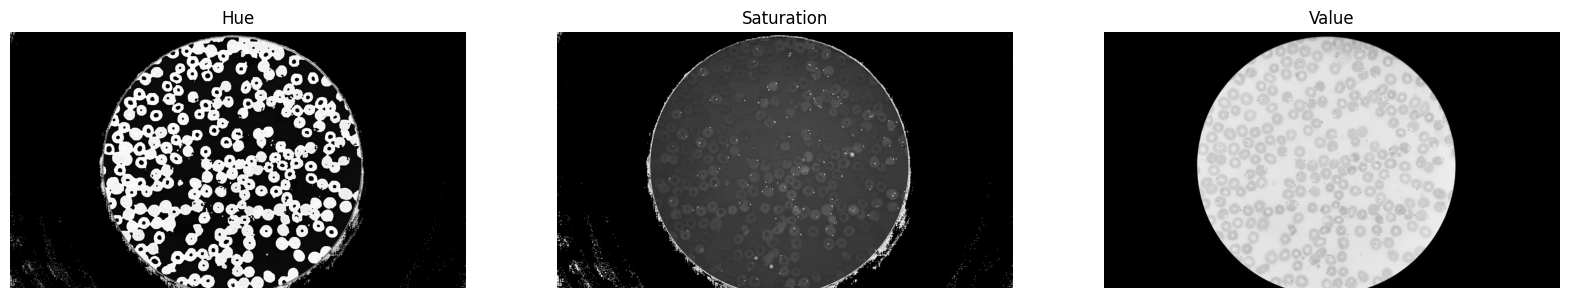

In [49]:
hsv = cv2.cvtColor(rgb, cv2.COLOR_RGB2HSV)
h_ch, s_ch, v_ch = cv2.split(hsv)

fig, ax = plt.subplots(1, 3, figsize=(20, 6))

ax[0].imshow(h_ch, cmap='gray')
ax[0].set_title("Hue")

ax[1].imshow(s_ch, cmap='gray')
ax[1].set_title("Saturation")

ax[2].imshow(v_ch, cmap='gray')
ax[2].set_title("Value")

for a in ax: a.axis('off')
plt.show()

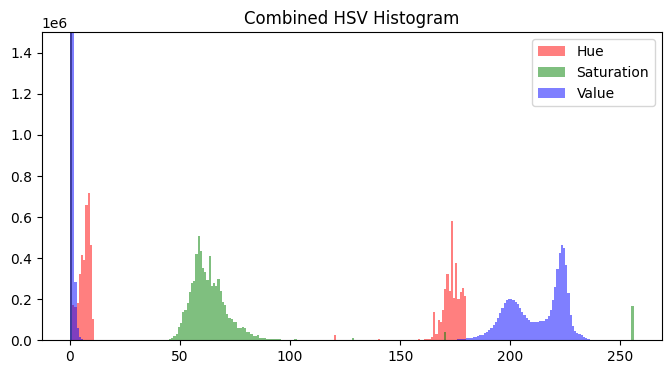

In [39]:
plt.figure(figsize=(8, 4))

plt.hist(h_ch.ravel(), 256, range=[0, 256], color='red', alpha=0.5, label='Hue')
plt.hist(s_ch.ravel(), 256, range=[0, 256], color='green', alpha=0.5, label='Saturation')
plt.hist(v_ch.ravel(), 256, range=[0, 256], color='blue', alpha=0.5, label='Value')
plt.ylim(0,1.5e6)

plt.title("Combined HSV Histogram")
plt.legend()
plt.show()

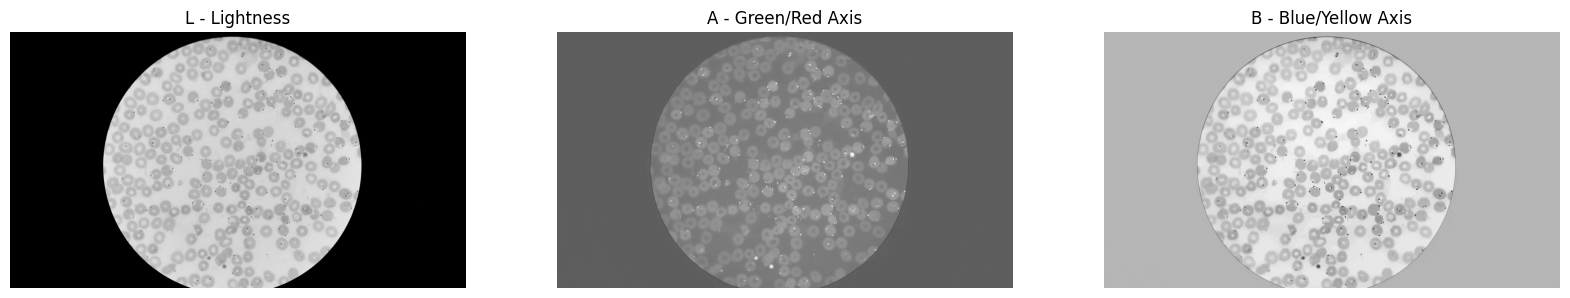

In [35]:
lab = cv2.cvtColor(rgb, cv2.COLOR_RGB2LAB)
l_ch, a_ch, b_ch = cv2.split(lab)

fig, ax = plt.subplots(1, 3, figsize=(20, 6))

ax[0].imshow(l_ch, cmap='gray')
ax[0].set_title("L - Lightness")

ax[1].imshow(a_ch, cmap='gray')
ax[1].set_title("A - Green/Red Axis")

ax[2].imshow(b_ch, cmap='gray')
ax[2].set_title("B - Blue/Yellow Axis")

for a in ax: a.axis('off')
plt.show()

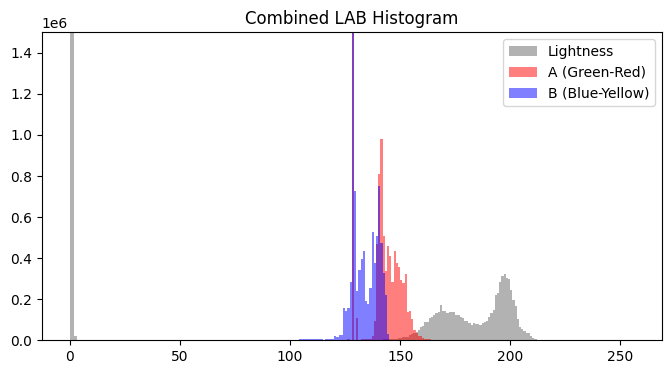

In [37]:
plt.figure(figsize=(8, 4))

plt.hist(l_ch.ravel(), 256, range=[0, 256], color='black', alpha=0.3, label='Lightness')
plt.hist(a_ch.ravel(), 256, range=[0, 256], color='red', alpha=0.5, label='A (Green-Red)')
plt.hist(b_ch.ravel(), 256, range=[0, 256], color='blue', alpha=0.5, label='B (Blue-Yellow)')
plt.ylim(0,1.5e6)
plt.title("Combined LAB Histogram")
plt.legend()
plt.show()

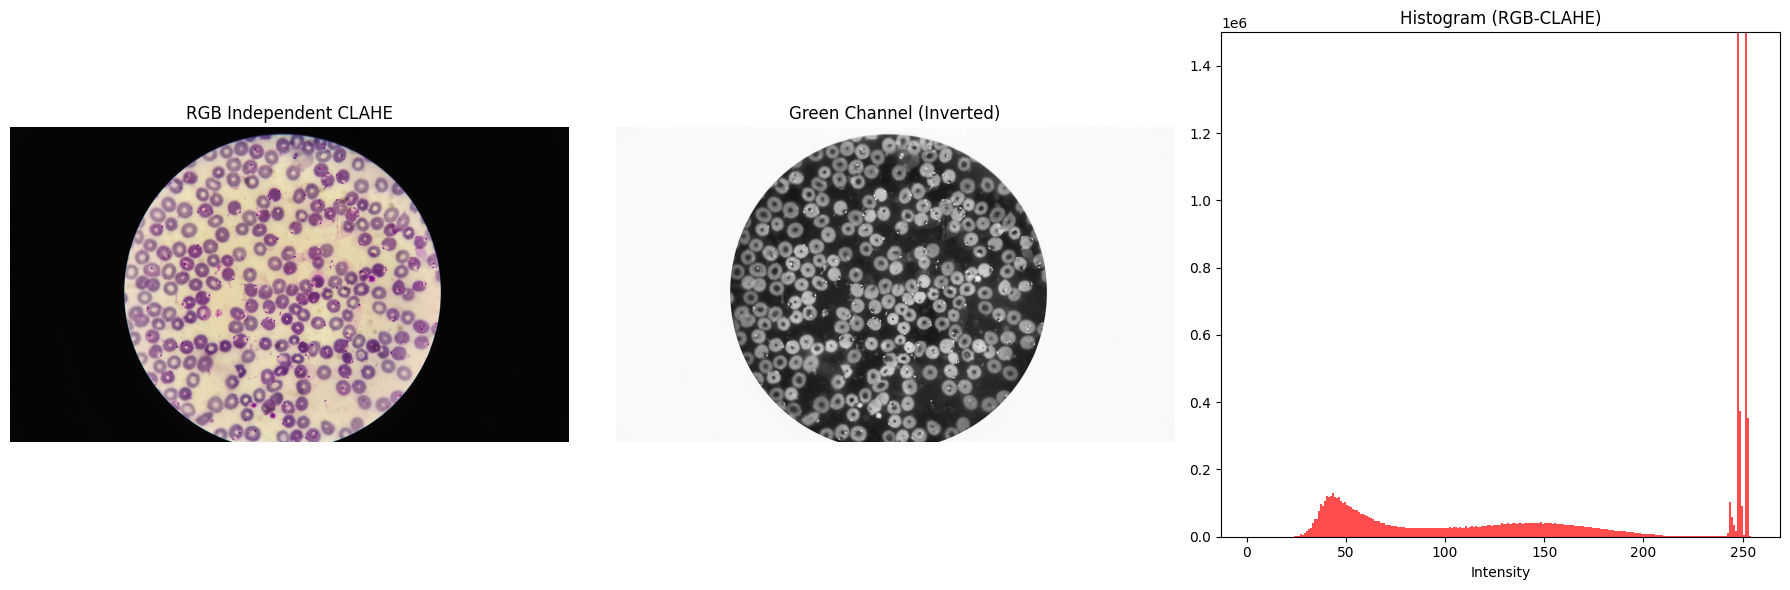

In [ ]:
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))

r_c = clahe.apply(rgb[:, :, 0])
g_c = clahe.apply(rgb[:, :, 1])
b_c = clahe.apply(rgb[:, :, 2])

rgb_clahe_all = cv2.merge((r_c, g_c, b_c))
feature_rgb_clahe = 255 - g_c  

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

ax[0].imshow(rgb_clahe_all)
ax[0].set_title("RGB Independent CLAHE")
ax[0].axis('off')

ax[1].imshow(feature_rgb_clahe, cmap='gray')
ax[1].set_title("Green Channel (Inverted)")
ax[1].axis('off')

# Histogram
ax[2].hist(feature_rgb_clahe.ravel(), 256, range=[0, 256], color='red', alpha=0.7)
ax[2].set_title("Histogram (RGB-CLAHE)")
ax[2].set_xlabel("Intensity")
ax[2].set_ylim(0,1.5e6)

plt.tight_layout()
plt.show()

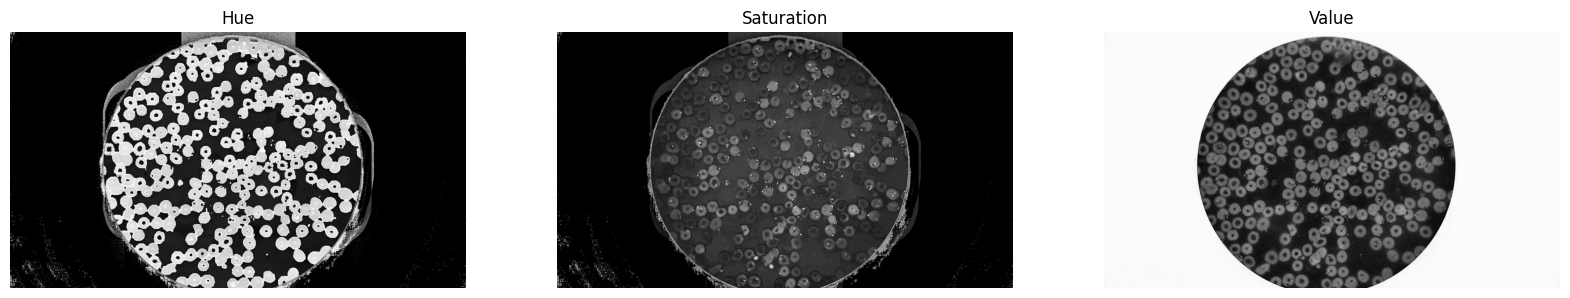

In [52]:
hsv = cv2.cvtColor(rgb_clahe_all, cv2.COLOR_RGB2HSV)
h_ch, s_ch, v_ch = cv2.split(hsv)

fig, ax = plt.subplots(1, 3, figsize=(20, 6))

ax[0].imshow(h_ch, cmap='gray')
ax[0].set_title("Hue")

ax[1].imshow(s_ch, cmap='gray')
ax[1].set_title("Saturation")

ax[2].imshow(255 - v_ch, cmap='gray')
ax[2].set_title("Value")

for a in ax: a.axis('off')
plt.show()

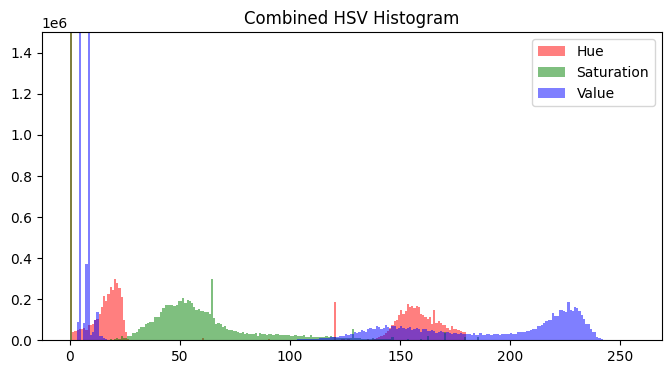

In [53]:
plt.figure(figsize=(8, 4))

plt.hist(h_ch.ravel(), 256, range=[0, 256], color='red', alpha=0.5, label='Hue')
plt.hist(s_ch.ravel(), 256, range=[0, 256], color='green', alpha=0.5, label='Saturation')
plt.hist(v_ch.ravel(), 256, range=[0, 256], color='blue', alpha=0.5, label='Value')
plt.ylim(0,1.5e6)

plt.title("Combined HSV Histogram")
plt.legend()
plt.show()

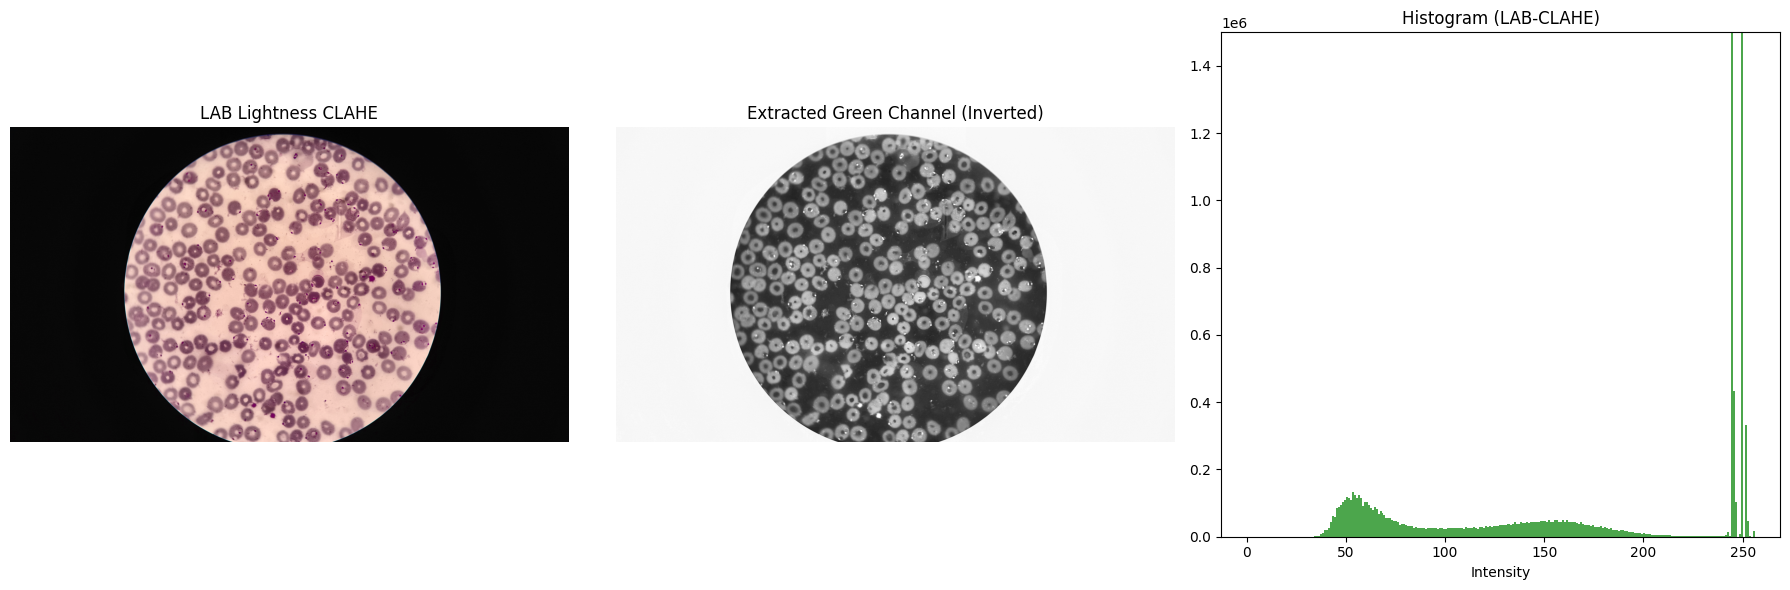

In [ ]:
lab = cv2.cvtColor(rgb, cv2.COLOR_RGB2LAB)
l, a, b_ch = cv2.split(lab)

clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
l_enhanced = clahe.apply(l)

lab_enhanced = cv2.merge((l_enhanced, a, b_ch))
rgb_clahe_lab = cv2.cvtColor(lab_enhanced, cv2.COLOR_LAB2RGB)

feature_lab_clahe = 255 - rgb_clahe_lab[:, :, 1]

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

ax[0].imshow(rgb_clahe_lab)
ax[0].set_title("LAB Lightness CLAHE")
ax[0].axis('off')

ax[1].imshow(feature_lab_clahe, cmap='gray')
ax[1].set_title("Extracted Green Channel (Inverted)")
ax[1].axis('off')

# Histogram
ax[2].hist(feature_lab_clahe.ravel(), 256, range=[0, 256], color='green', alpha=0.7)
ax[2].set_title("Histogram (LAB-CLAHE)")
ax[2].set_xlabel("Intensity")
ax[2].set_ylim(0,1.5e6)

plt.tight_layout()
plt.show()

# Final Choice of Channel

## Green Inverted after CLAHE

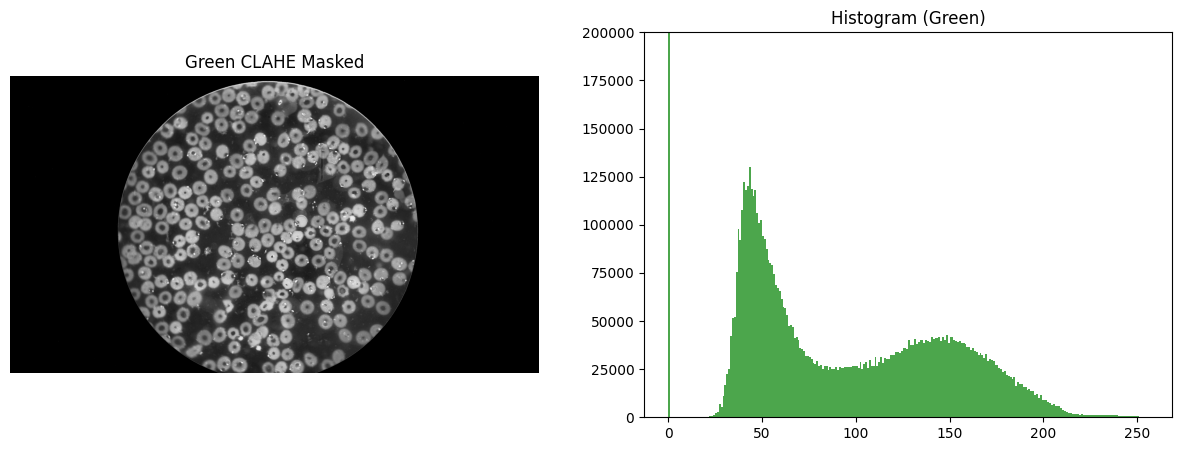

In [56]:
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
g_c = clahe.apply(rgb[:, :, 1])

green_inverted = 255 - g_c

gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)
_, roi_mask = cv2.threshold(gray, 15, 255, cv2.THRESH_BINARY)

img_green = cv2.bitwise_and(green_inverted, green_inverted, mask=roi_mask)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].imshow(img_green, cmap='gray')
ax[0].set_title("Green CLAHE Masked")
ax[0].axis('off')

ax[1].hist(img_green.ravel(), 256, range=[0, 256], color='green', alpha=0.7)
ax[1].set_title("Histogram (Green)")
ax[1].set_ylim(0, 0.2e6) 

plt.show()


## HUE

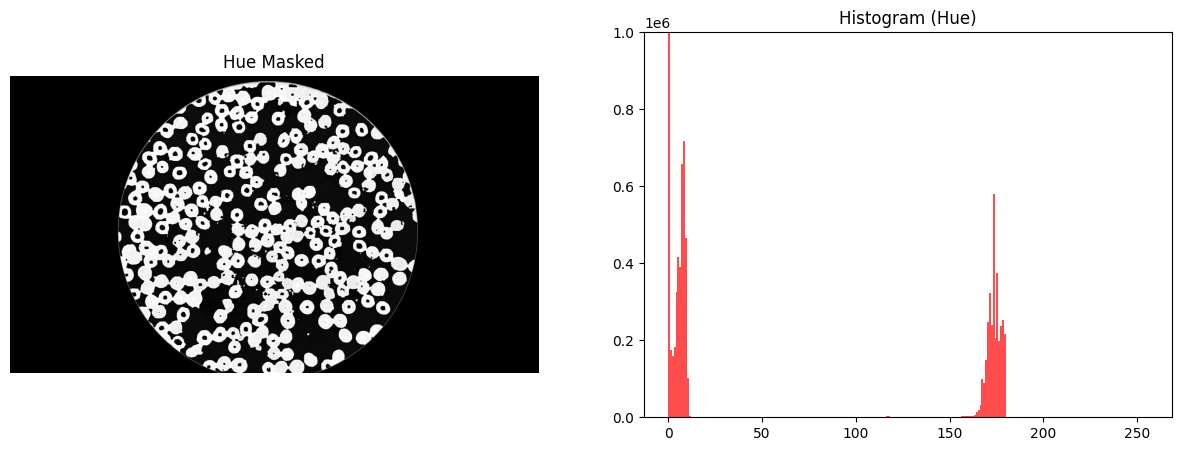

In [58]:
hsv = cv2.cvtColor(rgb, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv)

_, v_mask = cv2.threshold(v, 30, 255, cv2.THRESH_BINARY)

img_hue = cv2.bitwise_and(h, h, mask=v_mask)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].imshow(img_hue, cmap='gray')
ax[0].set_title("Hue Masked")
ax[0].axis('off')

# Гистограмма только для валидных пикселей
ax[1].hist(img_hue.ravel(), 256, range=[0, 256], color='red', alpha=0.7)
ax[1].set_title("Histogram (Hue)")
ax[1].set_ylim(0, 1e6) 

plt.show()